In [3]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import data
df=pd.read_csv('Bank Churn Modelling.csv')

In [45]:
#Analyse data
df.head

<bound method NDFrame.head of               Surname  CreditScore  Geography  Gender  Age  Tenure    Balance  \
CustomerId                                                                      
15634602     Hargrave          619          2  Female   42       2       0.00   
15647311         Hill          608          0  Female   41       1   83807.86   
15619304         Onio          502          2  Female   42       8  159660.80   
15701354         Boni          699          2  Female   39       1       0.00   
15737888     Mitchell          850          0  Female   43       2  125510.82   
...               ...          ...        ...     ...  ...     ...        ...   
15606229     Obijiaku          771          2    Male   39       5       0.00   
15569892    Johnstone          516          2    Male   35      10   57369.61   
15584532          Liu          709          2  Female   36       7       0.00   
15682355    Sabbatini          772          1    Male   42       3   75075.31  

In [40]:
df.tail()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
CustomerId,,,,,,,,,,,,,
15606229,Obijiaku,771,2,Male,39,5,0.00,2,1,0,96270.64,0,0
15569892,Johnstone,516,2,Male,35,10,57369.61,1,1,1,101699.77,0,1
15584532,Liu,709,2,Female,36,7,0.00,1,0,1,42085.58,1,0
15682355,Sabbatini,772,1,Male,42,3,75075.31,2,1,0,92888.52,1,1
15628319,Walker,792,2,Female,28,4,130142.79,1,1,0,38190.78,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [9]:
df.duplicated('CustomerId').sum()

np.int64(9930)

In [11]:
df=df.set_index('CustomerId')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [38]:
#Data Encoding
df['Geography'].value_counts()
df.replace({'Geography': {'France': 2, 'Germany': 1, 'Spain': 0}}, inplace=True)

df['Has Credit Card'].value_counts()
df['Is Active Member'].value_counts()



Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [32]:
df.loc[(df['Balance']==0),'Churn'].value_counts()


Churn
0    3117
1     500
Name: count, dtype: int64

<Axes: >

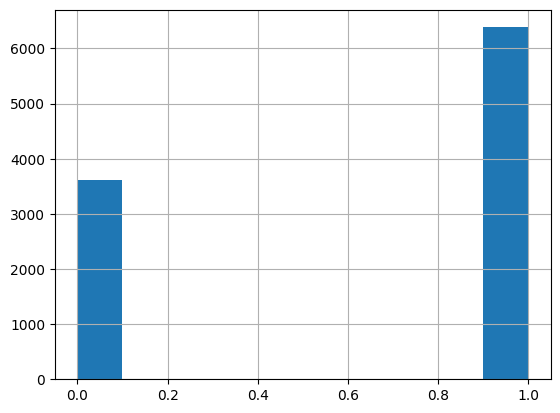

In [37]:


df['Zero Balance'] = np.where(df['Balance'] > 0, 1, 0)
df['Zero Balance'].hist()




In [39]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [41]:
#Modeling
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [47]:
x = df.drop(['Surname', 'Churn'], axis=1)
y = df['Churn']
x.shape, y.shape

((10000, 11), (10000,))